Imagen cargada correctamente.


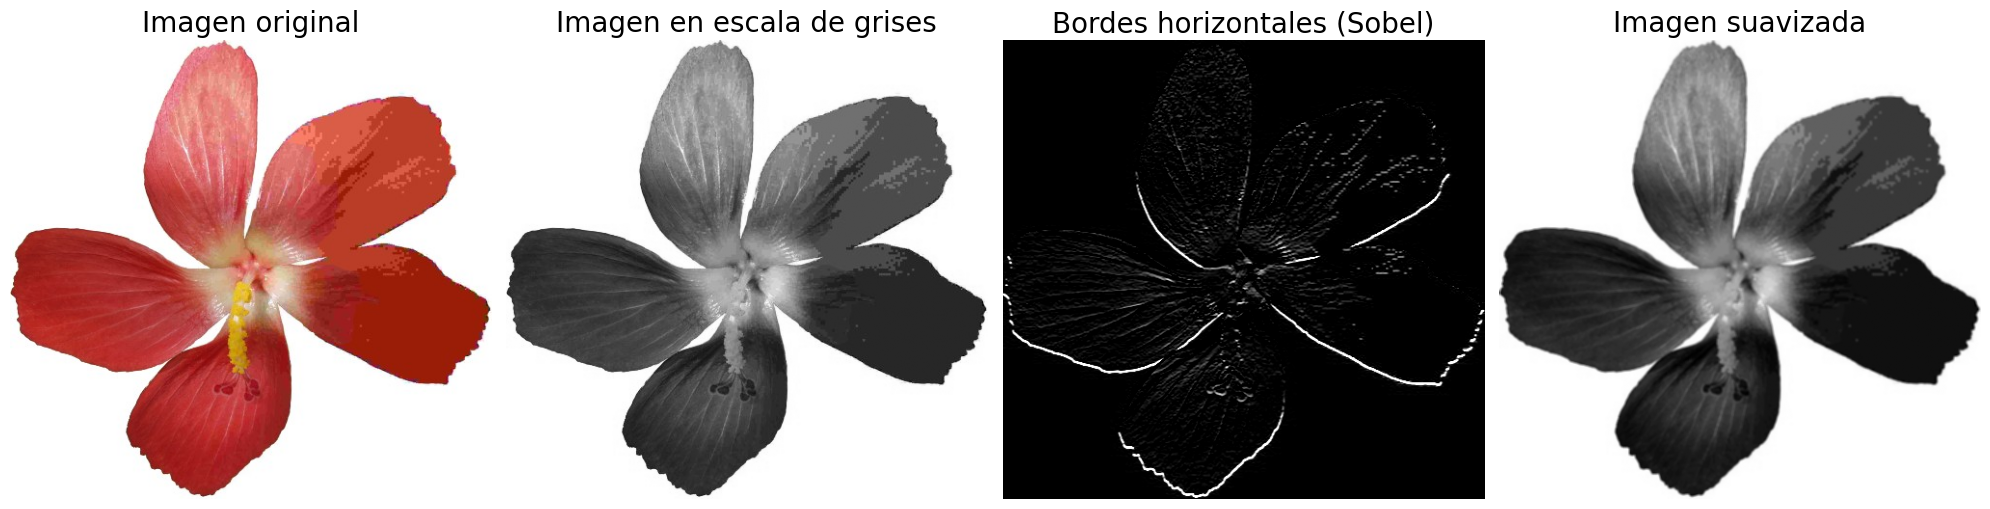

In [6]:
import cv2
import numpy as np
from urllib.request import urlopen
from matplotlib import pyplot as plt

# Descargar la imagen desde internet directamente en memoria usando urllib
url = "https://upload.wikimedia.org/wikipedia/commons/3/3f/JPEG_example_flower.jpg"  # URL de la imagen
response = urlopen(url)  # Abre la URL
image_array = np.asarray(bytearray(response.read()), dtype=np.uint8)  # Convierte a un array de bytes
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)  # Decodifica la imagen en color (tres canales RGB)

# Verificar si la imagen fue cargada correctamente
if image is None:
    print("Error: No se pudo cargar la imagen.")
else:
    print("Imagen cargada correctamente.")

# Convertir la imagen a escala de grises para aplicar las máscaras
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar la máscara Sobel para detectar bordes horizontales
sobel_horizontal = np.array([[-1, -2, -1],
                              [0, 0, 0],
                              [1, 2, 1]])
edges_horizontal = cv2.filter2D(gray_image, -1, sobel_horizontal)

# Aplicar la máscara de suavizado (media)
smoothing_kernel = np.array([[1, 1, 1],
                              [1, 1, 1],
                              [1, 1, 1]], dtype=np.float32) / 9  # Normalizar la máscara
smoothed_image = cv2.filter2D(gray_image, -1, smoothing_kernel)

# Mostrar los resultados
plt.figure(figsize=(20, 5))

# Imagen original en color
plt.subplot(1, 4, 1)
plt.title("Imagen original", fontsize=20)  # Título más grande
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convertir de BGR a RGB para matplotlib
plt.axis("off")

# Imagen en escala de grises
plt.subplot(1, 4, 2)
plt.title("Imagen en escala de grises", fontsize=20)  # Título más grande
plt.imshow(gray_image, cmap="gray")
plt.axis("off")

# Bordes horizontales detectados
plt.subplot(1, 4, 3)
plt.title("Bordes horizontales (Sobel)", fontsize=20)  # Título más grande
plt.imshow(edges_horizontal, cmap="gray")
plt.axis("off")

# Imagen suavizada
plt.subplot(1, 4, 4)
plt.title("Imagen suavizada", fontsize=20)  # Título más grande
plt.imshow(smoothed_image, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

Imagen cargada correctamente.


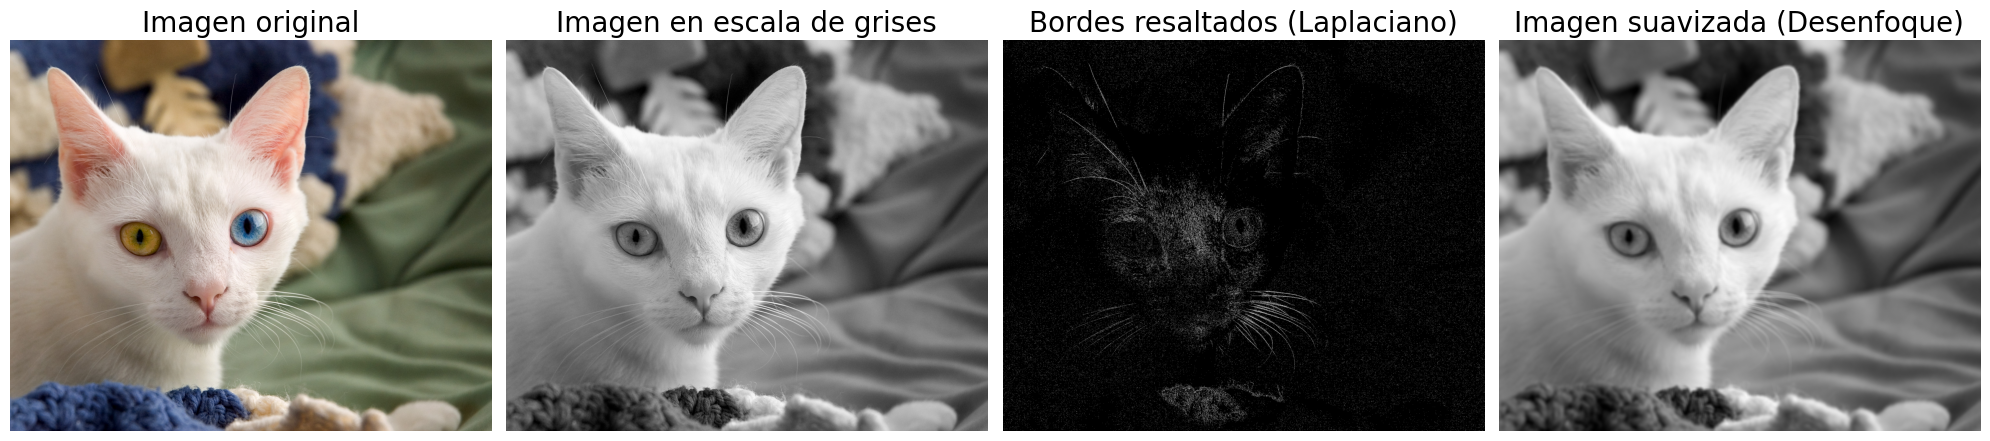

In [9]:
import cv2
import numpy as np
from urllib.request import urlopen
from matplotlib import pyplot as plt

# Descargar una nueva imagen desde internet directamente en memoria
url = "https://upload.wikimedia.org/wikipedia/commons/a/a3/June_odd-eyed-cat.jpg"  # Nueva imagen
response = urlopen(url)
image_array = np.asarray(bytearray(response.read()), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)  # Cargar imagen en color

# Verificar si la imagen fue cargada correctamente
if image is None:
    print("Error: No se pudo cargar la imagen.")
else:
    print("Imagen cargada correctamente.")

# Convertir la imagen a escala de grises para aplicar los filtros
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar el filtro Laplaciano para detección de bordes
laplacian_kernel = np.array([[0, -1, 0],
                              [-1, 4, -1],
                              [0, -1, 0]])
laplacian_edges = cv2.filter2D(gray_image, -1, laplacian_kernel)

# Resaltar los bordes: Amplificar y normalizar los valores
laplacian_edges = cv2.convertScaleAbs(laplacian_edges, alpha=2, beta=50)  # Aumentar contraste
laplacian_edges = cv2.normalize(laplacian_edges, None, 0, 255, cv2.NORM_MINMAX)

# Opcional: Aplicar un umbral para destacar los bordes más prominentes
_, laplacian_edges = cv2.threshold(laplacian_edges, 50, 255, cv2.THRESH_BINARY)

# Aplicar un filtro de desenfoque agresivo con un kernel de tamaño más grande
blur_kernel = np.ones((15, 15), dtype=np.float32) / 225  # Kernel de 15x15 normalizado
blurred_image = cv2.filter2D(gray_image, -1, blur_kernel)

# Mostrar los resultados
plt.figure(figsize=(20, 5))

# Imagen original en color
plt.subplot(1, 4, 1)
plt.title("Imagen original", fontsize=20)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convertir de BGR a RGB para matplotlib
plt.axis("off")

# Imagen en escala de grises
plt.subplot(1, 4, 2)
plt.title("Imagen en escala de grises", fontsize=20)
plt.imshow(gray_image, cmap="gray")
plt.axis("off")

# Bordes detectados y resaltados (Filtro Laplaciano)
plt.subplot(1, 4, 3)
plt.title("Bordes resaltados (Laplaciano)", fontsize=20)
plt.imshow(laplacian_edges, cmap="gray")
plt.axis("off")

# Imagen suavizada agresivamente (Desenfoque)
plt.subplot(1, 4, 4)
plt.title("Imagen suavizada (Desenfoque)", fontsize=20)
plt.imshow(blurred_image, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()